Saudi Arabia Used Cars Market Analysis & Price Prediction

Project Overview
This project aims to analyze and gain insights from the Saudi Arabian used car market using a real-world dataset. The study covers the entire data science pipeline, from initial data cleaning and exploratory analysis to building a predictive model for car prices.

Objectives
Data Cleaning & Preprocessing: Handling missing values, inconsistent formats (like "Negotiable" prices), and preparing features for analysis.

Exploratory Data Analysis (EDA): Identifying the key factors that influence car prices in the local market.

Data Visualization: Creating clear visual representations of:

Average car prices per brand/make.

Average car age across different types.

Average mileage (distance traveled) per car type.

Predictive Modeling: Developing a Machine Learning model (using XGBoost) to predict the market value of cars based on their specific features.

***************************************************************************

First, I will begin with exploratory data analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Desktop\cars_data.csv")
df.drop(df.columns[0], axis=1, inplace=True)
print (df.head())
print ('*'*50)
df.info()


       Make     Type  Year Origin   Color    Options  Engine_Size Fuel_Type  \
0  Chrysler     C300  2018  Saudi   Black       Full          5.7       Gas   
1    Nissan   Patrol  2016  Saudi   White       Full          4.8       Gas   
2    Nissan    Sunny  2019  Saudi  Silver   Standard          1.5       Gas   
3   Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6       Gas   
4   Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0       Gas   

   Gear_Type Condition  Mileage  Region       Price  Negotiable  
0  Automatic      Used   103000  Riyadh      114000       False  
1  Automatic      Used     5448  Riyadh  Negotiable        True  
2  Automatic      Used    72418  Riyadh       27500       False  
3  Automatic      Used   114154  Riyadh       43000       False  
4  Automatic      Used    41912  Riyadh       59500       False  
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data

Based on my analysis of the columns, I will convert the manufacturing year column to a column representing the car's age.

In [2]:
df['Age'] = 2025-df['Year']
print (df['Age'])
df.drop('Year', axis=1, inplace=True)
data = df.copy()

0        7
1        9
2        6
3        6
4        6
        ..
8243    10
8244    15
8245    12
8246    14
8247    12
Name: Age, Length: 8248, dtype: int64


The modified version of the data was retained.

In [3]:
print (data.head())

       Make     Type Origin   Color    Options  Engine_Size Fuel_Type  \
0  Chrysler     C300  Saudi   Black       Full          5.7       Gas   
1    Nissan   Patrol  Saudi   White       Full          4.8       Gas   
2    Nissan    Sunny  Saudi  Silver   Standard          1.5       Gas   
3   Hyundai  Elantra  Saudi    Grey   Standard          1.6       Gas   
4   Hyundai  Elantra  Saudi  Silver  Semi Full          2.0       Gas   

   Gear_Type Condition  Mileage  Region       Price  Negotiable  Age  
0  Automatic      Used   103000  Riyadh      114000       False    7  
1  Automatic      Used     5448  Riyadh  Negotiable        True    9  
2  Automatic      Used    72418  Riyadh       27500       False    6  
3  Automatic      Used   114154  Riyadh       43000       False    6  
4  Automatic      Used    41912  Riyadh       59500       False    6  


Now I will check for missing values ​​in the columns

In [4]:
print (data.shape)
print (data.isnull().sum())

(8248, 14)
Make              0
Type              0
Origin           95
Color             0
Options         109
Engine_Size    2266
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
Age               0
dtype: int64


It was found that there were missing values ​​in four columns, three of which were text-based and the percentage of missing values ​​in them was very small, so I will fill them with the mod. As for the fourth column, which is the engine size, a quarter of it is empty, and due to its importance, it cannot be deleted, so I will fill in the missing values ​​for each brand with the average engine size for that brand.

In [5]:
data['Price'] = np.where(data['Price']=='Negotiable', np.nan, data['Price'])

data['Price'] = pd.to_numeric(data['Price'])


target = ['Origin','Options','Engine_Size','Gear_Type']

for column in target :
    if column in ['Origin', 'Options', 'Gear_Type']:
        data[column].fillna(data[column].mode()[0], inplace=True)
    if column == 'Engine_Size':
       data[column] = data[column].fillna(data.groupby('Type')[column].transform('mean'))

C:\Users\USER\AppData\Local\Temp\ipykernel_16468\2110447292.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16468\2110447292.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [6]:
print (data.isnull().sum())

Make              0
Type              0
Origin            0
Color             0
Options           0
Engine_Size      76
Fuel_Type         0
Gear_Type         0
Condition         0
Mileage           0
Region            0
Price          2596
Negotiable        0
Age               0
dtype: int64


In [7]:
data.dropna(axis=0, inplace=True)
data.drop('Negotiable', axis=1, inplace=True)

Here, the rows containing missing values ​​in the target variable were deleted because it is a mistake to populate it with incorrect values, as this directly and significantly affects the prediction results.

In [8]:
print (data.head())
print (data.isnull().sum())
print (f'number of raws is : {data.shape[0]}')

       Make     Type Origin   Color    Options  Engine_Size Fuel_Type  \
0  Chrysler     C300  Saudi   Black       Full          5.7       Gas   
2    Nissan    Sunny  Saudi  Silver   Standard          1.5       Gas   
3   Hyundai  Elantra  Saudi    Grey   Standard          1.6       Gas   
4   Hyundai  Elantra  Saudi  Silver  Semi Full          2.0       Gas   
5     Honda   Accord  Saudi    Navy       Full          1.5       Gas   

   Gear_Type Condition  Mileage  Region     Price  Age  
0  Automatic      Used   103000  Riyadh  114000.0    7  
2  Automatic      Used    72418  Riyadh   27500.0    6  
3  Automatic      Used   114154  Riyadh   43000.0    6  
4  Automatic      Used    41912  Riyadh   59500.0    6  
5  Automatic      Used    39000  Riyadh   72000.0    7  
Make           0
Type           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Condition      0
Mileage        0
Region         0
Price          0
Age            

The data cleaning phase has ended

**************

This is the final step in the analysis phase, where I will present charts showing the average prices for each brand, average lifespan, and average distance traveled, and display them graphically.

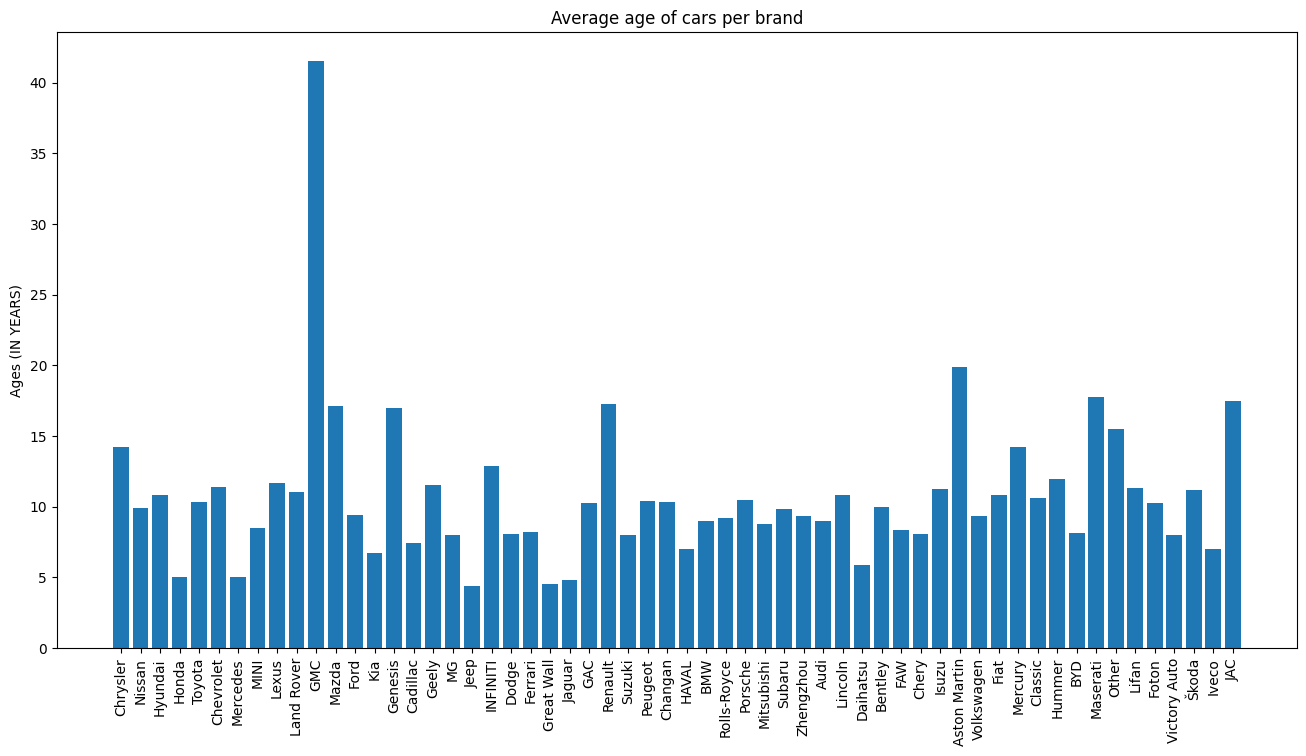

In [9]:
age = data.groupby('Make')['Age'].mean()
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(data['Make'].unique(), age)
plt.title('Average age of cars per brand')
plt.ylabel('Ages (IN YEARS)')
plt.xticks(rotation=90)
plt.show()

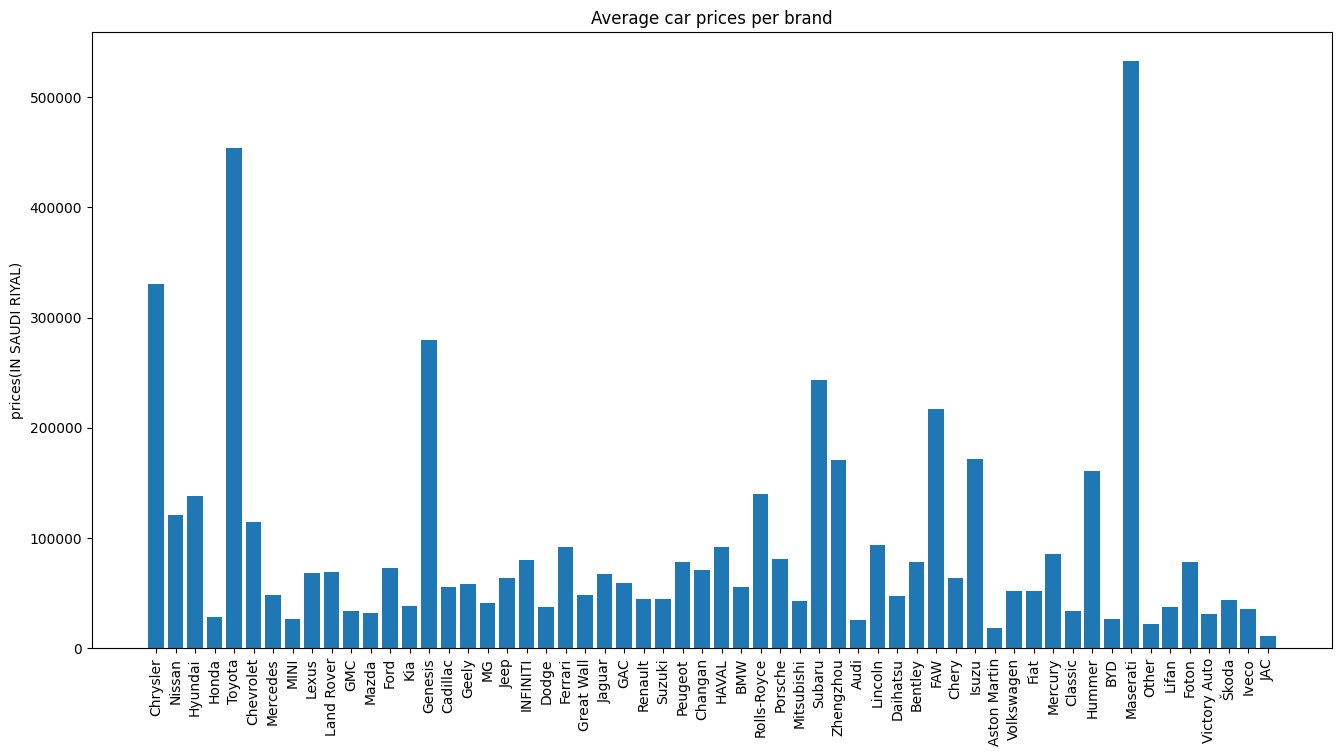

In [10]:
prices = data.groupby('Make')['Price'].mean()
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(data['Make'].unique(), prices)
plt.title('Average car prices per brand')
plt.ylabel('prices(IN SAUDI RIYAL)')
plt.xticks(rotation=90)
plt.show()

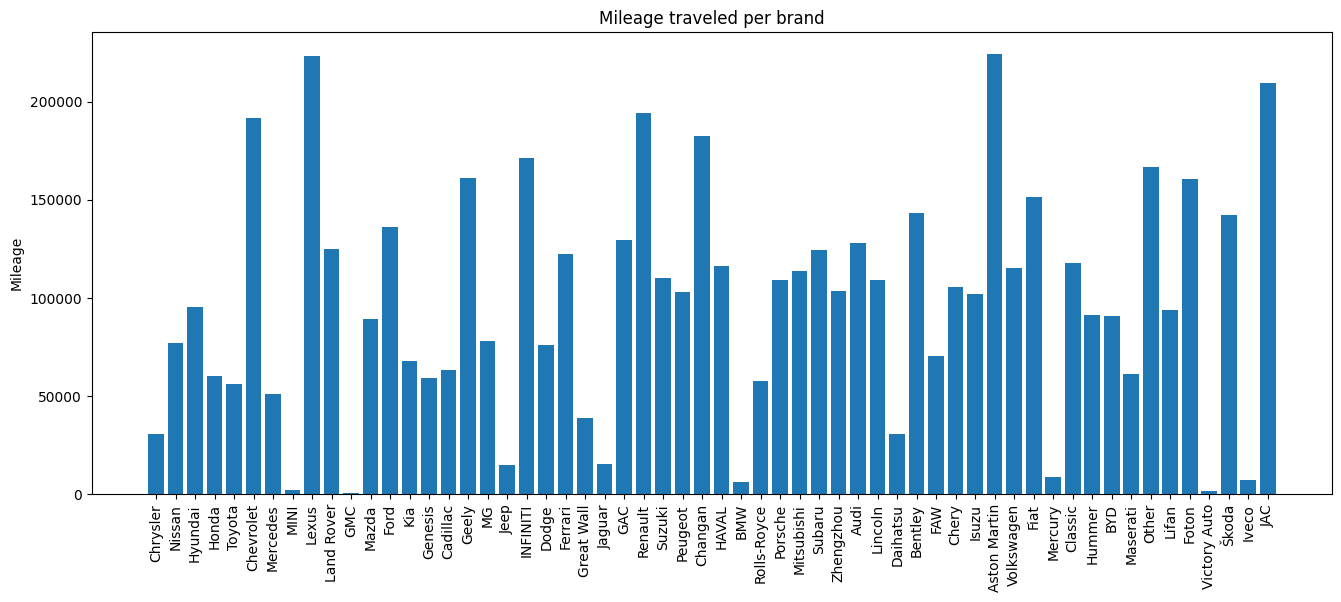

In [11]:
mileage = data.groupby('Make')['Mileage'].mean()
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(data['Make'].unique(), mileage)
plt.title('Mileage traveled per brand')
plt.ylabel('Mileage')
plt.xticks(rotation=90)
plt.show()

Here we examine the deviation of the numerical columns and apply the logarithm to large deviations.

In [12]:
numeric = data.select_dtypes(include='number').columns.drop('Price')
for col in numeric:
    print (f'skew before : {data[col].skew()}')
    if data[col].skew() > 1.25:  
        data[col] = np.log1p(data[col])
    print (f'skew after {data[col].skew()}')


skew before : 0.7370645770386107
skew after 0.7370645770386107
skew before : 39.660296906862975
skew after -1.8653167450576222
skew before : 2.682520765513872
skew after 0.7172111009478864


Now I will present a map illustrating the relationships of the variables to the target variable, which is price.

float64


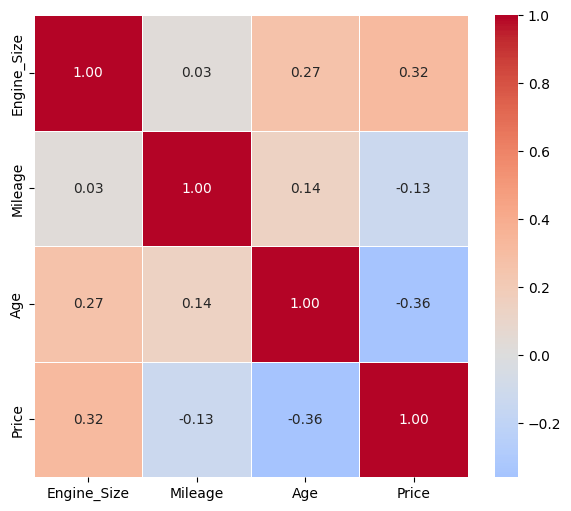

In [13]:
import seaborn as sns

corr = data[['Engine_Size','Mileage','Age','Price']].corr()

plt.figure(figsize=(7, 6))

print (data['Price'].dtype)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, lw=0.5)
plt.show()

High correlation ( | r | > 0.7) confirms these variables as strong price predictors

In [14]:
print (data['Price'].skew())

3.7144244264301642


Here i will apply the logarithm transforme on the target column just for training data to train the model and after that i will reverse the result to copare it with the real data to calculate the metrics

Now I will build an xgboost model to train on data to predict local car prices. I chose this model because of its capabilities.
I chose XGBoost (Extreme Gradient Boosting) because it provides built-in regularization to prevent overfitting and handles missing values effectively, making it ideal for car price prediction

In [15]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = [col for col in data.columns if col != 'Price']
y = 'Price'

x_train, x_test, y_train, y_test = train_test_split(data[x], data[y], test_size=0.2)
Y_train = np.log1p(y_train)

In [16]:
object_cols = data.select_dtypes(include=('object')).columns.tolist()
numeric_cols = data.select_dtypes(include=('number')).drop('Price', axis=1).columns.tolist()
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocess = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('cat', encoder, object_cols)
    ]
)

X_train = preprocess.fit_transform(x_train)
X_test = preprocess.transform(x_test)


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    "n_estimators": randint(800, 1200),
    "learning_rate": uniform(0.05, 0.1),  
    "max_depth": randint(4, 6),
    "min_child_weight": randint(3, 6),
    "gamma": uniform(0, 0.2),
    "subsample": uniform(0.7, 0.2),     
    "colsample_bytree": uniform(0.7, 0.2)
}

xgb_model = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",  
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,                  
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1,
    random_state=42
)


In the previous cell, randomized search CV was used due to its high efficiency; it can find the best parameters within the specified boundaries, unlike grid search CV, which only tries parameters manually provided to it.

In [ ]:
random_search.fit(X_train, Y_train)

best_model = random_search.best_estimator_

print('best parameters')
print(random_search.best_params_)

Y_pred = random_search.predict(X_test)
y_pred = np.expm1(Y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print (f'Mean absolute error = {mae}')
print (f'Mean squared error = {mse}')
print (f'r2_score = {r2}')


Typical performance is between 0.8 and 0.85 R2_score, Which is the best, and is considered a very good result given the highly dispersed and fragmented data.

*** ENG MOHAMMAD ***